<a href="https://colab.research.google.com/github/DeepakRagupathy/Stock/blob/main/Stock__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def data_collection(foldername,column_name):
  folder_path = '/content/drive/MyDrive/metrics_data/'  + foldername
  df_list = {}

  for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df_list["Date"]=df["Date"].values
        df_list[filename.replace(".csv","")]=df[column_name].values



  return pd.DataFrame(df_list)

In [ ]:
df1=data_collection("Return_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")
df2=data_collection("Risk_adjusted_return_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")
df3=data_collection("Risk_metrics",column_name="Aditya Birla SL Flexi Cap Fund(G)")

In [ ]:
# Merge DataFrames on 'Date'
final_df = pd.merge(df1, df2, on='Date', how='outer')
final_df = pd.merge(final_df, df3, on='Date', how='outer')

# Save to CSV
final_df.to_csv('combined_two_columns_horizontal.csv', index=False)

print("Saved combined data to 'combined_two_columns_horizontal.csv'")


Saved combined data to 'combined_two_columns_horizontal.csv'


In [ ]:
data=pd.read_csv('/content/combined_two_columns_horizontal.csv')
data

,Date,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-10-31,0.138448,0.379160,0.186560,0.195508,0.138448,0.186560,0.337364,0.379160,0.177302,...,-0.307307,-0.062837,0.952605,-0.058911,1.077072,-0.093244,1.042767,0.927427,1.013455,0.976842
178,2024-11-30,0.152963,0.286926,0.178354,0.198926,0.152963,0.178354,0.350314,0.286926,0.175389,...,-0.307307,-0.063589,0.971868,-0.062668,1.047792,-0.093781,1.042767,0.927427,1.014129,0.967847
179,2024-12-31,0.138644,0.185206,0.174224,0.200590,0.138644,0.174224,0.344119,0.185206,0.172124,...,-0.307307,-0.058491,1.001823,-0.073013,1.039148,-0.095259,1.038526,0.906337,1.013544,0.965555
180,2025-01-31,0.132125,0.123053,0.161082,0.200405,0.132125,0.161082,0.328056,0.123053,0.167213,...,-0.269433,-0.069819,1.016982,-0.107102,1.003926,-0.094718,1.064831,0.953915,1.015578,0.963268


In [ ]:
data.shape

(182, 58)

In [ ]:
data.size

10556

In [ ]:
data.describe()

,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,Sharpe_Ratio_12m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
count,146.000000,170.000000,122.000000,111.000000,146.000000,122.000000,159.000000,170.000000,135.000000,170.000000,...,122.000000,146.000000,170.000000,169.000000,147.000000,122.000000,123.000000,171.000000,122.000000,146.000000
mean,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
std,0.087109,0.224501,0.050545,0.048036,0.087109,0.050545,0.178904,0.224501,0.079505,1.462771,...,0.061253,0.062498,0.088563,0.073491,0.107229,0.020988,0.083125,0.253643,0.019481,0.049684
min,-0.049205,-0.293776,0.020235,0.083638,-0.049205,0.020235,-0.142579,-0.293776,0.005751,-1.818931,...,-0.307753,-0.307753,0.680851,-0.307307,0.740509,-0.132488,0.796256,0.008350,0.971245,0.909971
25%,0.108689,0.005063,0.108488,0.132018,0.108689,0.108488,0.023898,0.005063,0.133060,-0.340824,...,-0.307307,-0.110790,0.931710,-0.133041,0.858590,-0.094248,0.884274,0.846265,1.008730,0.964499
50%,0.159133,0.096994,0.146598,0.161733,0.159133,0.146598,0.121551,0.096994,0.183348,0.219839,...,-0.307307,-0.065931,0.971496,-0.064205,0.976752,-0.078358,0.958376,0.963203,1.015334,1.012763
75%,0.206897,0.267008,0.191868,0.205975,0.206897,0.191868,0.276138,0.267008,0.231702,1.704531,...,-0.180427,-0.053774,1.017765,-0.031027,1.044390,-0.061471,1.036893,1.049359,1.031330,1.031915
max,0.337799,0.754734,0.258171,0.244086,0.337799,0.258171,0.614615,0.754734,0.298244,4.483901,...,-0.165077,-0.036592,1.254875,-0.000957,1.119909,-0.044394,1.068443,1.852057,1.062665,1.111650


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        182 non-null    object 
 1   Benchmark_Return_36m        146 non-null    float64
 2   CAGR_Return_12m             170 non-null    float64
 3   CAGR_Return_60m             122 non-null    float64
 4   Rolling_Average_Return_60m  111 non-null    float64
 5   CAGR_Return_36m             146 non-null    float64
 6   Benchmark_Return_60m        122 non-null    float64
 7   Rolling_Average_Return_12m  159 non-null    float64
 8   Benchmark_Return_12m        170 non-null    float64
 9   Rolling_Average_Return_36m  135 non-null    float64
 10  Sharpe_Ratio_12m            170 non-null    float64
 11  Sharpe_Ratio_60m            122 non-null    float64
 12  Sortino_Ratio_12m           170 non-null    float64
 13  M_Squared_12m               170 non

In [ ]:
data.head()

,Date,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Date', 'Benchmark_Return_36m', 'CAGR_Return_12m', 'CAGR_Return_60m',
       'Rolling_Average_Return_60m', 'CAGR_Return_36m', 'Benchmark_Return_60m',
       'Rolling_Average_Return_12m', 'Benchmark_Return_12m',
       'Rolling_Average_Return_36m', 'Sharpe_Ratio_12m', 'Sharpe_Ratio_60m',
       'Sortino_Ratio_12m', 'M_Squared_12m', 'Sharpe_Ratio_36m',
       'Sortino_Ratio_36m', 'Sortino_Ratio_60m', 'M_Squared_36m',
       'M_Squared_60m', 'Jensens_Alpha_12m', 'Treyners_Ratio_12m',
       'Jensens_Alpha_60m', 'Jensens_Alpha_36m', 'Treyners_Ratio_60m',
       'Treyners_Ratio_36m', 'Information_Ratio_36m', 'Information_Ratio_12m',
       'Information_Ratio_60m', 'Omega_Ratio_12m', 'Omega_Ratio_36m',
       'Omega_Ratio_60m', 'Efficiency_Ratio_60m', 'Efficiency_Ratio_36m',
       'Efficiency_Ratio_12m', 'Rolling_Alpha_12m', 'Rolling_Alpha_36m',
       'Rolling_Alpha_60m', 'Standard_Deviation_12m', 'VaR_12m',
       'Downside_Deviation_36m', 'Downside_Deviation_12m',
       'Standard

In [ ]:
data.iloc[:,[0,2]]

,Date,CAGR_Return_12m
0,2010-01-31,NaN
1,2010-02-28,NaN
2,2010-03-31,NaN
3,2010-04-30,NaN
4,2010-05-31,NaN
...,...,...
177,2024-10-31,0.379160
178,2024-11-30,0.286926
179,2024-12-31,0.185206
180,2025-01-31,0.123053


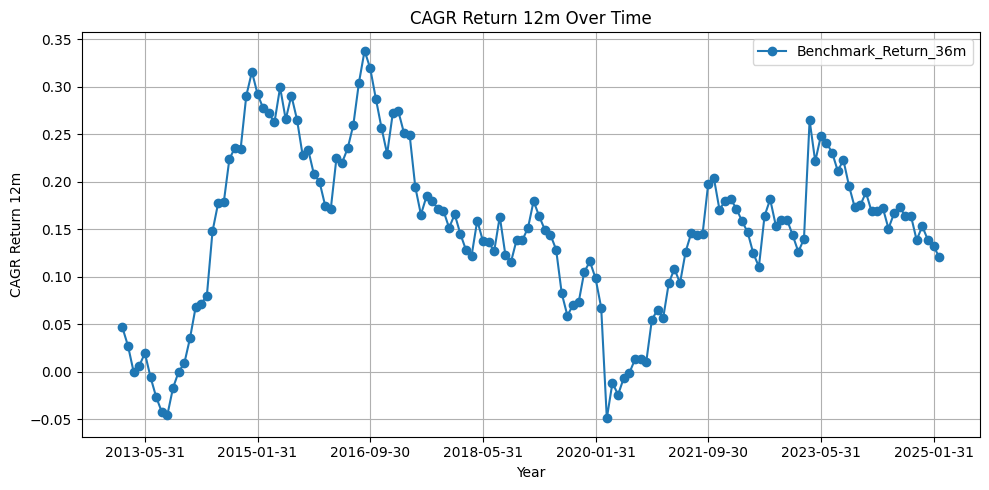

In [ ]:
# Plot directly using the first two columns
data.iloc[:, 0:2].plot(x=0, y=1, kind='line', marker='o', figsize=(10, 5), title='CAGR Return 12m Over Time')

# Customize the axes
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data.duplicated().any()

np.False_

In [ ]:
data.iloc[:,1:].isnull()

,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,Sharpe_Ratio_12m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
simple_imputer = SimpleImputer(strategy='mean')
simple_imputer.fit(data.iloc[:,1:])

SimpleImputer()

In [ ]:
simple_imputer.fit_transform(data.iloc[:,1:])

array([[0.15079827, 0.15851739, 0.15025001, ..., 0.9377611 , 1.01852556,
        1.00543289],
       [0.15079827, 0.15851739, 0.15025001, ..., 0.9377611 , 1.01852556,
        1.00543289],
       [0.15079827, 0.15851739, 0.15025001, ..., 0.9377611 , 1.01852556,
        1.00543289],
       ...,
       [0.13864401, 0.18520581, 0.17422379, ..., 0.90633741, 1.01354376,
        0.96555519],
       [0.13212487, 0.12305343, 0.16108206, ..., 0.95391454, 1.01557831,
        0.96326847],
       [0.12066217, 0.03635946, 0.15785907, ..., 0.90465544, 1.01334859,
        0.95009993]])

In [ ]:
cleaned_data=pd.DataFrame(simple_imputer.fit_transform(data.iloc[:,1:]),columns=data.columns[1:])

In [ ]:
cleaned_data

,Benchmark_Return_36m,CAGR_Return_12m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,Sharpe_Ratio_12m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
1,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
2,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
3,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
4,0.150798,0.158517,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.138448,0.379160,0.186560,0.195508,0.138448,0.186560,0.337364,0.379160,0.177302,2.390592,...,-0.307307,-0.062837,0.952605,-0.058911,1.077072,-0.093244,1.042767,0.927427,1.013455,0.976842
178,0.152963,0.286926,0.178354,0.198926,0.152963,0.178354,0.350314,0.286926,0.175389,1.733934,...,-0.307307,-0.063589,0.971868,-0.062668,1.047792,-0.093781,1.042767,0.927427,1.014129,0.967847
179,0.138644,0.185206,0.174224,0.200590,0.138644,0.174224,0.344119,0.185206,0.172124,1.001784,...,-0.307307,-0.058491,1.001823,-0.073013,1.039148,-0.095259,1.038526,0.906337,1.013544,0.965555
180,0.132125,0.123053,0.161082,0.200405,0.132125,0.161082,0.328056,0.123053,0.167213,0.421259,...,-0.269433,-0.069819,1.016982,-0.107102,1.003926,-0.094718,1.064831,0.953915,1.015578,0.963268


In [ ]:
target=cleaned_data["CAGR_Return_12m"]
target

,CAGR_Return_12m
0,0.158517
1,0.158517
2,0.158517
3,0.158517
4,0.158517
...,...
177,0.379160
178,0.286926
179,0.185206
180,0.123053


In [ ]:
features= cleaned_data.drop(columns=["CAGR_Return_12m"], axis=1)
features

,Benchmark_Return_36m,CAGR_Return_60m,Rolling_Average_Return_60m,CAGR_Return_36m,Benchmark_Return_60m,Rolling_Average_Return_12m,Benchmark_Return_12m,Rolling_Average_Return_36m,Sharpe_Ratio_12m,Sharpe_Ratio_60m,...,Maximum_Drawdown_60m,Average_Drawdown_36m,Beta_12m,Average_Drawdown_12m,Downside_Capture_36m,Average_Drawdown_60m,Downside_Capture_60m,Downside_Capture_12m,Beta_60m,Beta_36m
0,0.150798,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,0.460343,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
1,0.150798,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,0.460343,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
2,0.150798,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,0.460343,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
3,0.150798,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,0.460343,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
4,0.150798,0.150250,0.168443,0.150798,0.150250,0.161462,0.158517,0.174562,0.707978,0.460343,...,-0.254381,-0.091461,0.978526,-0.085714,0.954834,-0.079209,0.947633,0.937761,1.018526,1.005433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.138448,0.186560,0.195508,0.138448,0.186560,0.337364,0.379160,0.177302,2.390592,0.592583,...,-0.307307,-0.062837,0.952605,-0.058911,1.077072,-0.093244,1.042767,0.927427,1.013455,0.976842
178,0.152963,0.178354,0.198926,0.152963,0.178354,0.350314,0.286926,0.175389,1.733934,0.550642,...,-0.307307,-0.063589,0.971868,-0.062668,1.047792,-0.093781,1.042767,0.927427,1.014129,0.967847
179,0.138644,0.174224,0.200590,0.138644,0.174224,0.344119,0.185206,0.172124,1.001784,0.528797,...,-0.307307,-0.058491,1.001823,-0.073013,1.039148,-0.095259,1.038526,0.906337,1.013544,0.965555
180,0.132125,0.161082,0.200405,0.132125,0.161082,0.328056,0.123053,0.167213,0.421259,0.458967,...,-0.269433,-0.069819,1.016982,-0.107102,1.003926,-0.094718,1.064831,0.953915,1.015578,0.963268


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2.3325205991092963e-29
R² Score: 1.0


In [ ]:
# Make a prediction for future data (Example: using the last row in the dataset)
future_data = features.iloc[-1, :].values.reshape(1, -1)  # Assuming you want to predict using the last row
future_stock_value = model.predict(future_data)

print("Predicted future stock value:", future_stock_value)

Predicted future stock value: [0.03635946]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted future stock value: 0.036359458527915604


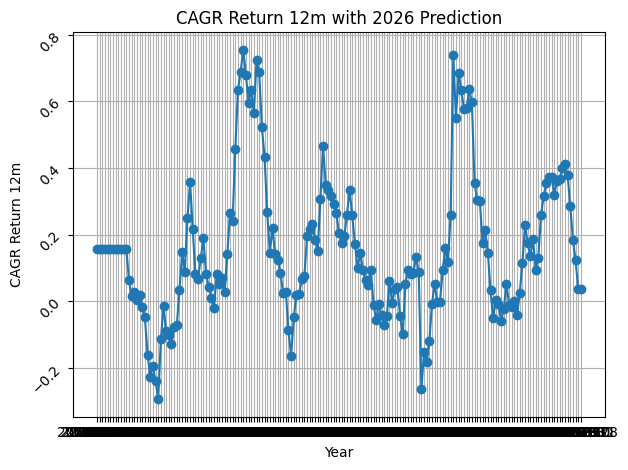

In [ ]:
future_data = features.iloc[-1, :].values.reshape(1, -1)
future_stock_value = model.predict(future_data)[0]

print("Predicted future stock value:", future_stock_value)

# Plot historical data and predicted value
years = data['Date'].tolist()  # Assuming 'Date' is your x-axis
values = target.tolist()

# Add the predicted value for 2026
years.append('2026')
values.append(future_stock_value)

# Plot the graph
plt.plot(years, values, marker='o')
plt.title('CAGR Return 12m with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.yticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

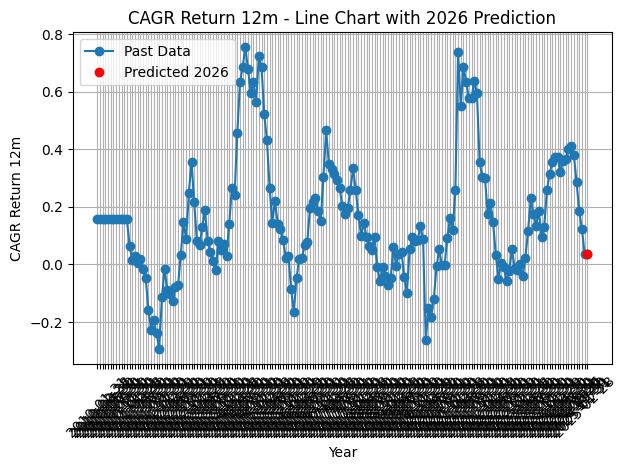

In [ ]:
plt.plot(years, values, marker='o', label='Past Data')
plt.plot('2026', future_stock_value, 'ro', label='Predicted 2026')
plt.title('CAGR Return 12m - Line Chart with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


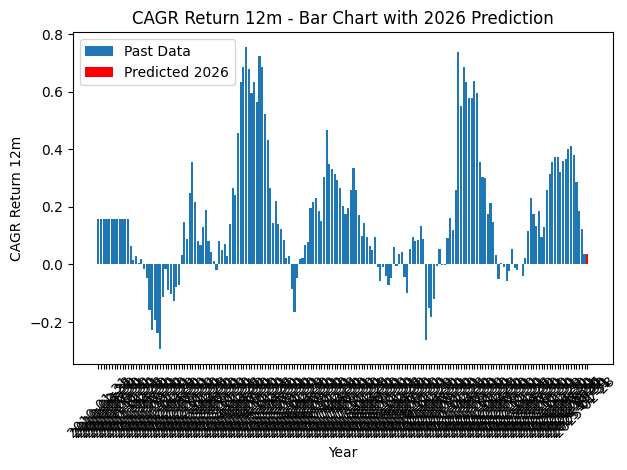

In [ ]:
plt.bar(years[:-1], values[:-1], label='Past Data')  # Exclude prediction for now
plt.bar('2026', future_stock_value, color='red', label='Predicted 2026')  # Prediction in red
plt.title('CAGR Return 12m - Bar Chart with 2026 Prediction')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


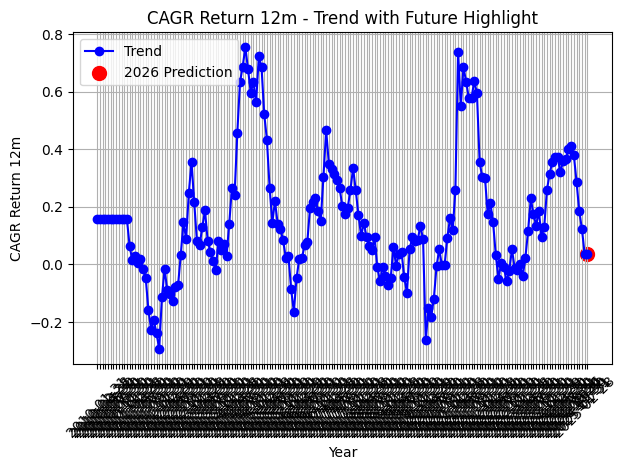

In [ ]:
plt.plot(years, values, linestyle='-', marker='o', color='blue', label='Trend')
plt.scatter('2026', future_stock_value, color='red', s=100, label='2026 Prediction')
plt.title('CAGR Return 12m - Trend with Future Highlight')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Using Other Models

In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [ ]:
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [ ]:

# Support Vector Regressor
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred))

In [ ]:
# Evaluate each model
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("KNN", y_test, knn_preds)
evaluate_model("SVM", y_test, svm_preds)


Decision Tree Performance:
R² Score: 0.9730374296160714
RMSE: 0.0013958788540435272

KNN Performance:
R² Score: 0.8437467174595598
RMSE: 0.008089386503858589

SVM Performance:
R² Score: 0.824135131882753
RMSE: 0.009104697626319193


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted CAGR_Return_12m for 2026: 0.0856


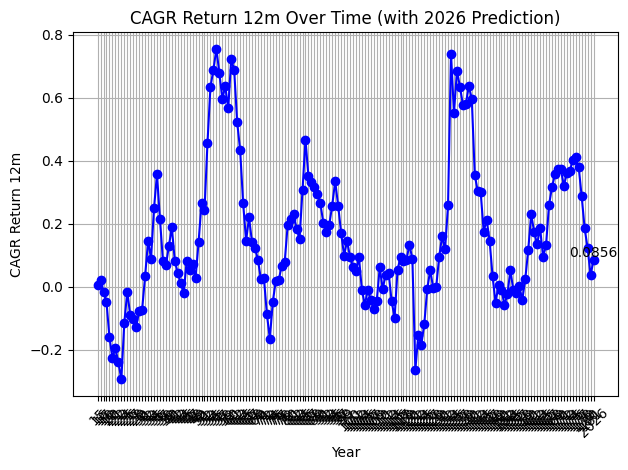

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prepare the data
df = data[["CAGR_Return_12m"]].copy()

# Create lag features
df['lag_1'] = df['CAGR_Return_12m'].shift(1)
df['lag_2'] = df['CAGR_Return_12m'].shift(2)
df['lag_3'] = df['CAGR_Return_12m'].shift(3)

# Drop NaN values due to lagging
df.dropna(inplace=True)

# Features and target
X = df[['lag_1', 'lag_2', 'lag_3']]
y = df['CAGR_Return_12m']

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Use the last row to predict 2026
latest_lags = df[['lag_1', 'lag_2', 'lag_3']].iloc[-1].values.reshape(1, -1)
future_stock_value = model.predict(latest_lags)[0]

# Output the prediction for 2026
print(f"Predicted CAGR_Return_12m for 2026: {future_stock_value:.4f}")

# Visualization (showing historical data with the prediction for 2026)
years = df.index.tolist()
values = df['CAGR_Return_12m'].tolist()

# Append the 2026 prediction
years.append('2026')
values.append(future_stock_value)

# Create a simple plot
plt.plot(years, values, marker='o', color='b')

# Highlight the prediction for 2026
plt.text('2026', future_stock_value, f'{future_stock_value:.4f}', horizontalalignment='center', verticalalignment='bottom')

# Labels and title
plt.title('CAGR Return 12m Over Time (with 2026 Prediction)')
plt.xlabel('Year')
plt.ylabel('CAGR Return 12m')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
